<a href="https://colab.research.google.com/github/matheusfsm/Data-Science-Projects/blob/master/Predictive_Maintenance_Turbofan_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução - Manutenção Preditiva de um Motor Turbofan

## Com o aumento do número de voos, é muito essencial que os motores sejam monitorados regularmente o motor não deve quebrar antes da manutenção programada e a avaria pode causar problemas graves durante um voo. O custo de manutenção também aumentará e a manutenção preditiva manual é muito cara
## Requer trabalho e não é eficaz para encontrar os problemas e precisamos de manutenção baseada em condições em vez de manutenção baseada em tempo. A análise prognóstica de vários parâmetros do motor pode nos ajudar a melhorar a disponibilidade do motor e reduzir os custos de manutenção.


## Os motores têm um padrão de degradação progressiva esses padrões podem ser facilmente encontrados nas medições do sensor, o aprendizado de máquina pode usar os dados históricos para comparar as leituras do sensor e os eventos de falha, usando esses dados, o aprendizado de máquina pode prever quando o mecanismo falhará com base nas leituras do sensor ao vivo.

## Baixe e pré-processe o conjunto de dados C-MAPSS do motor Turbofan.
## Visualize os dados.
## Identificar referências.
## Transformação de recursos.
## Seleção de modelo.
## Treinar e avaliar o modelo.


## Estes dados foram disponibilizados pela Nasa e podem ser baixados através clicando [aqui](https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/#turbofan).

## Este projeto foi inspirado neste [vídeo](https://www.youtube.com/watch?v=AS0H43hMoWM) e também neste guia disponivel no kaggle






## Beneficios da Manutenção preditiva:

* Estimar o tempo de atividade do ativo
* Planejamento para manutenção do ativo
* Reduzir a chance de uma parada inesperada
* Maximizar o tempo de vida do ativo
* Minimizar as chances de um acidente

# De veículos conectados a robôs inteligentes no chão de fábrica, a quantia de dados de dispositivos sendo gerada em nosso mundo é maior do que nunca, no entanto, a maior parte desses dados de IoT não é explorada ou usada de forma alguma. Por exemplo, um estudo da McKinsey & Company descobriu que uma plataforma offshore de petróleo gera dados de 30.000 sensores, mas menos de 1% deles é usado atualmente para a tomada de decisões.

# Sobre esta descrição do conjunto de dados:
O gerenciamento de prognósticos e integridade é um tópico importante na indústria para prever o estado dos ativos para evitar tempo de inatividade e falhas. Este conjunto de dados é a versão Kaggle do conjunto de dados público muito conhecido para modelagem de degradação de ativos da NASA. Inclui dados simulados Run-to-Failure de motores a jato turbofan.

A simulação de degradação do motor foi realizada usando C-MAPSS. Quatro conjuntos diferentes foram simulados sob diferentes combinações de condições operacionais e modos de falha. Grava vários canais de sensores para caracterizar a evolução da falha. O conjunto de dados foi fornecido pelo Prognostics CoE da NASA Ames.

Objetivo de previsão Neste conjunto de dados, o objetivo é prever a vida útil restante (RUL) de cada motor no conjunto de dados de teste. RUL é equivalente ao número de voos restantes para o motor após o último ponto de dados no conjunto de dados de teste.

# Qual é o ganho em poder predizer falhas em motores de avião?

Sistemas de Monitoramento:
- Detectar indicadores de falha
- Prever o tempo de manutenção
- Identificar componentes

Melhorar a disponibilidade da aeronave:
- Partidas e chegadas pontuais
- Planejar e otimizar a manutenção
- Reduzir o tempo fora de serviço do motor

Reduzir os custos de manutenção
- Assistência para solução de problemas
- Limitar danos secundários

## monitoramento remoto dos ativos
## manutenção preditiva
## simulação
## conexão e comunicação entre ativos

### Estas são as variáveis e seus respectivos significados:

*   ```T2``` = Total temperature at fan inlet ()
*   ```T24``` = Total temperature at LPC outlet (Rankine scale)
*   ```T30``` = Total temperature at HPC outlet (Rankine scale)
*   ```T50``` = Total temperature at LPT outlet (Rankine scale)
*   ```P30``` = Total pressure at HPC outlet (psi)
*   ```Nf``` = Physical fan speed (rpm)
*   ```Nc``` = Physical core speed (rpm)
*   ```Ps30``` = Static pressure at HPC outlet (psia)
*   ```phi``` = Ratio of fuel flow to Ps30 (pps/psi)
*   ```NRf``` = Corrected fan speed (rpm)
*   ```Nrc``` = Corrected core speed (rpm)
*   ```BPR``` = Bypass Ratio (--)
*   ```ht_Bleed``` = Bleed Enthalpy (--)
*   ```W31``` = HPT coolant bleed (lbm/s)
*   ```W32``` = LPT coolant bleed (lbm/s)

### Não vou me aventurar em tentar entender como funciona todos os sensores, mas se olharmos para o mapa de calor, podemos criar algumas hipóteses sobre as correlações.

<figure>
  <p align=center>
<img src="https://www.researchgate.net/publication/348472709/figure/fig1/AS:979966627958790@1610653659534/Schematic-representation-of-the-CMAPSS-model-as-depicted-in-the-CMAPSS-documentation-23.ppm" width=100%">
<figcaption> <p align=center> <font size="2">
Turbofan engine structure by ResearchGate. </figcaption> </p>





<figure>
  <p align=center>
<img src="https://www.researchgate.net/profile/Robert-Gao/publication/325564535/figure/fig4/AS:690279778619403@1541586932739/Diagram-of-aircraft-engine-modules-35.png" width=100%">
<figcaption> <p align=center> <font size="2">
Turbofan engine structure by ResearchGate. </figcaption> </p>

## Funcionamento e príncipio de um motor a reação:

Geralmente o motor turbofan pode ser divido em 3 módulos, o primeiro é composto pelo **Fan** e o compressor de baixa pressão (**LPC**), o segundo módulo é composto pelo compressor de alta pressão (**HPC**) câmara de combustão e a turbina de alta pressão (**HPT**), por último temos o terceiro módulo composto pela turbina de baixa pressão (**LPT**).

Conhecido como motor a reação funciona com base em um prícipio simples, a terceira lei de Newton, ação e reação, todos nós provavelmente participamos de uma festa de aniversário e tivemos que ajudar a encher os balões e muito provavelmente enquanto enchia o balão alguns se soltavam e saiam voando pelo ar, isso acontece pelo fato do volume de ar no interior do balão ser expulso de maneira abrupta pela pequena boca do balão, outra situação que podemos imaginar, é quando queremos sair pela estreita porta do metro lotado ao mesmo tempo.

O ar é "sugado" pelo Turbofan, que para aumentar a eficiência do empuxo gastando menor quantidade de combústivel transfere grande quantidade de ar pelo Bypass, essa taxa é chamada de (**BPR**), o bypass pode ser responsável por até 80% do empuxo, em contrapartida o que acontece num motor turbojato, é que ele possui uma taxa menor de ar deslocado para o bypass e uma pressão maior na saída, resultando em maior propulsão e maior consumo de combustível:

<figure>
  <p align=center>
<img src="https://www.economist.com/sites/default/files/images/print-edition/20160102_STC450.png" width=100%">
<figcaption> <p align=center> <font size="2">
Flying’s new gear by The Economist . </figcaption> </p>

O Bypass também tem relação direta com a amenização do ruído, e isso explica o fato de Jatos supersônicos perfurarem a barreira do som (1.226 km/h), suas poderosas turbinas causam uma imensa perturbação ao se deslocar e então a fonte de ruído se iguala a velocidade da propagação da onda:

<figure>
  <p align=center>
<img src="https://www.explicatorium.com/images/fisica/barreira-do-som.jpg" width=100%">
<figcaption> <p align=center> <font size="2">
Barreira do som by Explicatorium. </figcaption> </p>

Outra parte do ar deslocado pelo **Fan** passa para os compressores e é comprimido com a ajuda dos componentes mecânicos, o corpo possui o formato de funil e as aletas do eixo são posicionadas de maneira que o ar é "agitado", este processo tem como objetivo aumentar previamente a pressão e a temperatura, após este controle o ar passa pela camara de combustão onde ocorre a injeção de combustível através de bicos injetores, que passa a funcionar como um maçarico recebendo oxigênio fulltime para manter a chama acesa, a consequência disso é expadir o ar com o aquecimento e ganhar volume, neste ponto temos mais pressão e a mais temperatura e pode-se converter a energia térmica em energia mecânica quando o ar passa pelas aletas das turbinas de baixa e de alta pressão que por sua vez possuem um eixo concentrico que interliga o **Fan** e o compressor de baixa pressão (**LPC**):

<figure>
  <p align=center>
<img src="https://www.electricalelibrary.com/wp-content/uploads/2021/11/diagram-of-a-turbofan-engine.png" width=100%">
<figcaption> <p align=center> <font size="2">
Eixo concêntrico Fan e Turbina by Electrical e-Library.com. </figcaption> </p>

file:///C:/Users/mmartins/Downloads/data-06-00005-v2.pdf


## Contextualizando:

### Quando a pressão total na saída do **HPC** aumenta, a razão entre fluxo de combustível e pressão estática na saída do **HPC** também aumenta?

*   ```P30```  x ```phi``` = 0.81

### Quando a rotação do **fan** diminui, a razão entre fluxo de combustível e pressão estática na saída do **HPC** diminui?

*   ```phi```  x ```NRf``` = -0.79

### Quando a razão entre fluxo de combustível e pressão estática na saída do HPC diminui, a temperatura total na saída **LPT** diminui?

*   ```phi```  x ```T50``` = -0.82

### Quando a pressão total na saída do **HPC** diminui, a temperatura total na saída **LPT** diminui?

*   ```P30```  x ```T50``` = -0.82

### Essas são perguntas que podemos fazer ao analisar essas informações do mapa de calor.

### Também podemos tentar entender as correlações mais relevantes para nossa variável **target** (RLU).

### O que é RUL?
### A Vida Útil Remanescente (RUL) é uma estimativa subjetiva do número de anos restantes que um item, componente ou sistema é estimado como capaz de funcionar de acordo com sua finalidade pretendida antes de garantir a substituição. A vida útil restante é estimada com base em observações ou estimativas médias de itens, componentes ou sistemas semelhantes, ou uma combinação dos mesmos.

### Afinal o que é um ciclo de voo?

> A vida útil do motor é medida em horas de voo e ciclos de voo. Um ciclo = uma decolagem + uma aterrissagem.
Assim, um voo só de ida de Amsterdã para Nova York equivale a cerca de 8 horas de voo e 1 ciclo (ou seja, uma decolagem em Amsterdã + uma aterrissagem em Nova York). Uma viagem de ida e volta entre Amsterdã e Nova York equivaleria a 16 horas e 2 ciclos.[(KLM Blog)](https://blog.klm.com/pt-br/8-coisas-que-voce-provavelmente-nao-sabe-sobre-motores-a-jato/#:~:text=A%20vida%20%C3%BAtil%20do%20motor,uma%20aterrissagem%20em%20Nova%20York).

## Os motores do dataset foram submetidos aos mesmos ciclos...

### Quando um motor a reação precisa de manutenção?
> Todo motor deve passar por manutenção menor ou maior após um determinado número de ciclos de voo. Isso varia dependendo do tipo de motor. Por exemplo, o CF6-80E, que alimenta os Airbus A330 da KLM, requer grandes manutenções a cada 7.300 ciclos e pequenas manutenções a cada 200 a 400 ciclos.[(KLM Blog)](https://blog.klm.com/pt-br/8-coisas-que-voce-provavelmente-nao-sabe-sobre-motores-a-jato/#:~:text=A%20vida%20%C3%BAtil%20do%20motor,uma%20aterrissagem%20em%20Nova%20York).






In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

In [ ]:
fd_001_train = pd.read_csv("/content/drive/MyDrive/Data_sample_DS/Turbofan_Data_Set/train_FD001.txt",sep=" ", header=None)
fd_001_test = pd.read_csv("/content/drive/MyDrive/Data_sample_DS/Turbofan_Data_Set/test_FD001.txt",sep=" ", header=None)
test_results=pd.read_csv("/content/drive/MyDrive/Data_sample_DS/Turbofan_Data_Set/RUL_FD001.txt",sep=" ",header=None)

In [ ]:
fd_001_train.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [ ]:
fd_001_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

In [ ]:
fd_001_train.drop(columns=[26,27], inplace=True)
fd_001_test.drop(columns=[26,27], inplace=True)

In [ ]:
fd_001_train.columns = columns
fd_001_test.columns = columns

In [ ]:
fd_001_train.head()

,unit_number,time_in_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [ ]:
fd_001_train.describe()

,unit_number,time_in_cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


[]

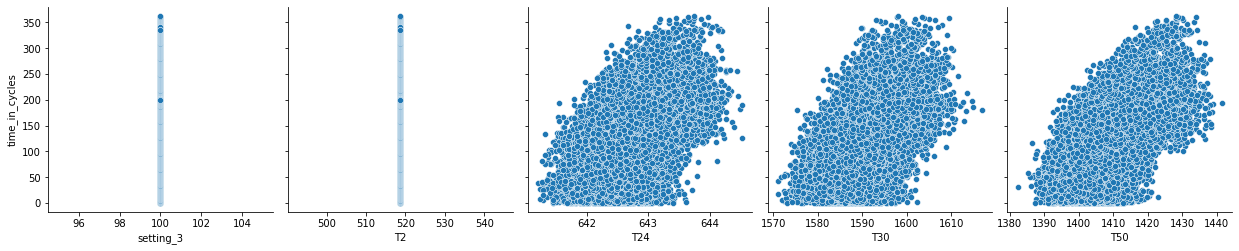

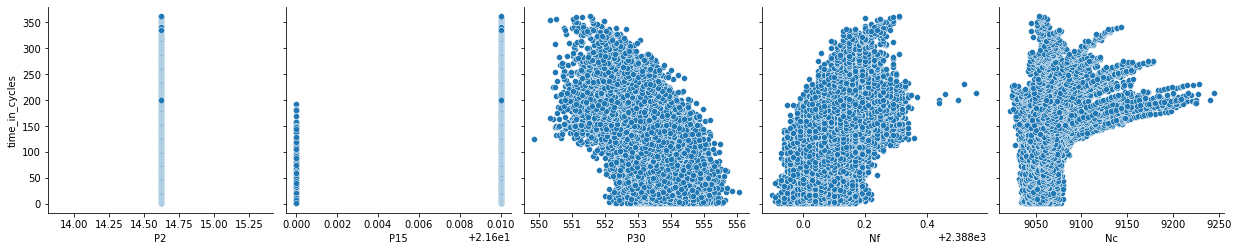

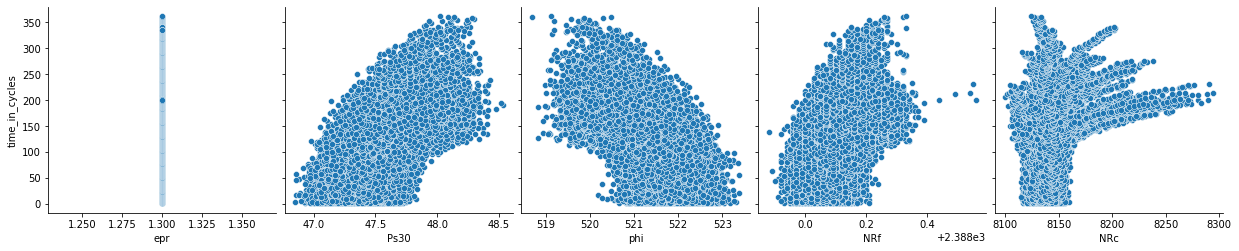

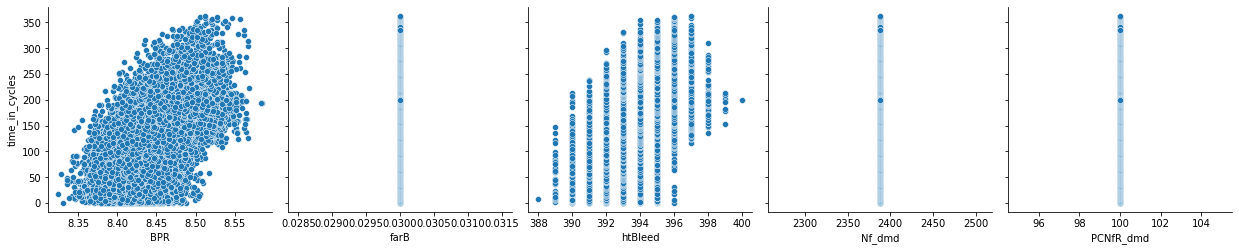

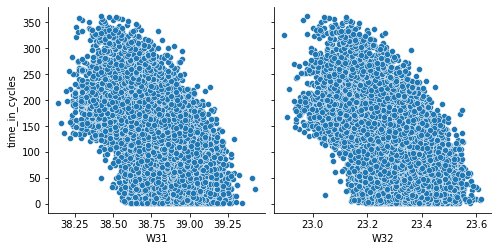

In [ ]:
# visualizar informações de distribuição
sns.pairplot(fd_001_train, palette='bone', y_vars=['time_in_cycles'], x_vars=columns[4:9],height=3.5)
sns.pairplot(fd_001_train, palette='bone', y_vars=['time_in_cycles'], x_vars=columns[9:14],height=3.5)
sns.pairplot(fd_001_train, palette='bone', y_vars=['time_in_cycles'], x_vars=columns[14:19],height=3.5)
sns.pairplot(fd_001_train, palette='bone', y_vars=['time_in_cycles'], x_vars=columns[19:24],height=3.5)
sns.pairplot(fd_001_train, palette='bone', y_vars=['time_in_cycles'], x_vars=columns[24:],height=3.5)
plt.plot()

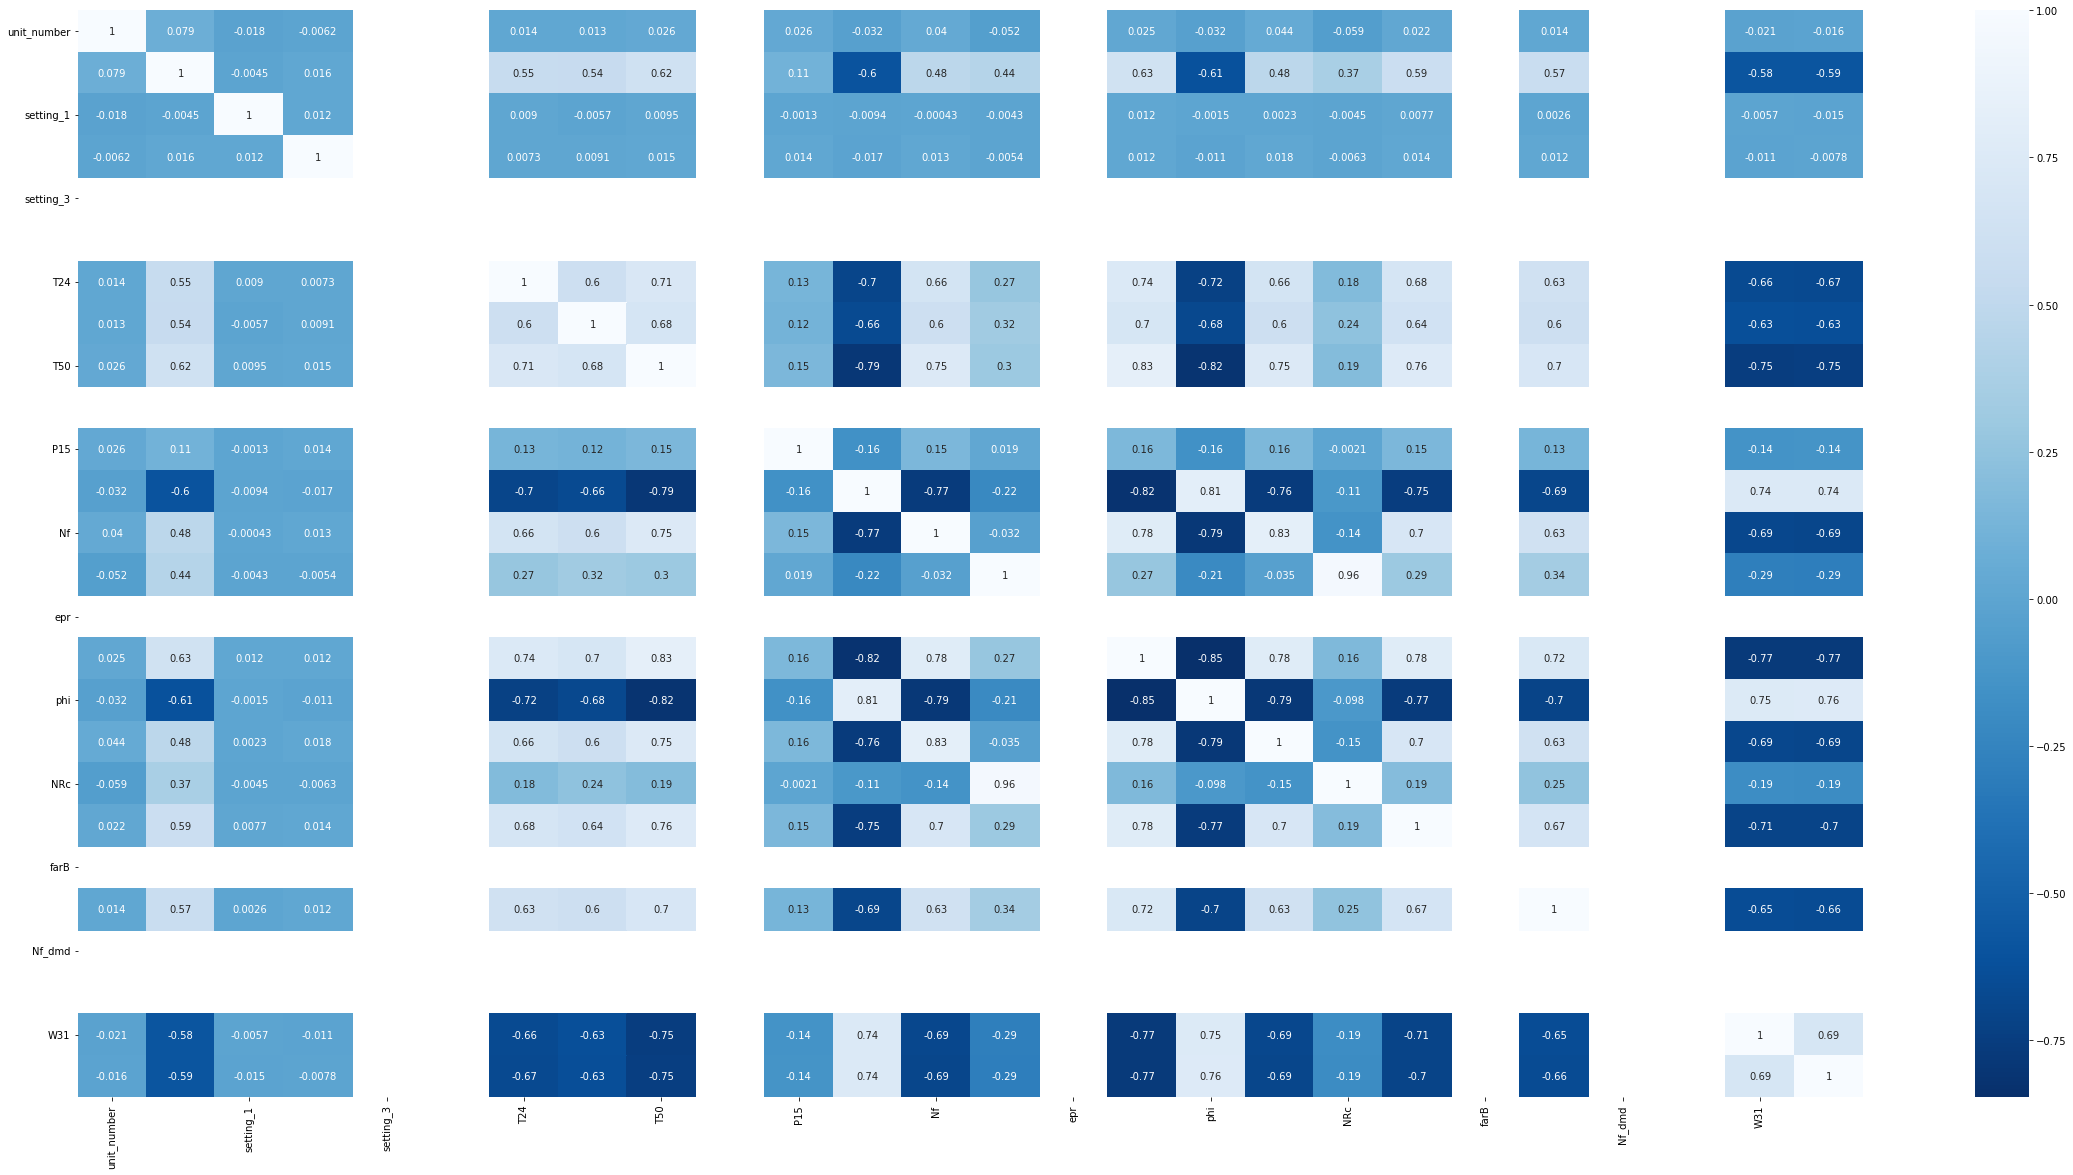

In [ ]:
# Understanding correlations with heatmap:
sns.heatmap(fd_001_train.corr(method='pearson'),annot=True,cmap='Blues_r')
fig=plt.gcf()
fig.set_size_inches(40,20)
plt.show()

Algumas variáveis apresentam valores constantes no nosso dataset, vamos aplicar a função drop, para remover estes dados, que não vão ter relevância no modelo que criaremos.

In [ ]:
# removendo colunas com dados constantes.
fd_001_train.drop(columns=['setting_3', 'T2','P2', 'P15','epr',
                             'farB', 'Nf_dmd', 'PCNfR_dmd'], inplace=True)

In [ ]:
# função para preparar dados de treinamento e formar uma coluna RUL com informações sobre o restante
# antes de quebrar ciclos
def prepare_train_data(data, factor = 0):
    df = data.copy()
    fd_RUL = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
    fd_RUL = pd.DataFrame(fd_RUL)
    fd_RUL.columns = ['unit_number','max']
    df = df.merge(fd_RUL, on=['unit_number'], how='left')
    df['RUL'] = df['max'] - df['time_in_cycles']
    df.drop(columns=['max'],inplace = True)

    return df[df['time_in_cycles'] > factor]

In [ ]:
df = prepare_train_data(fd_001_train)

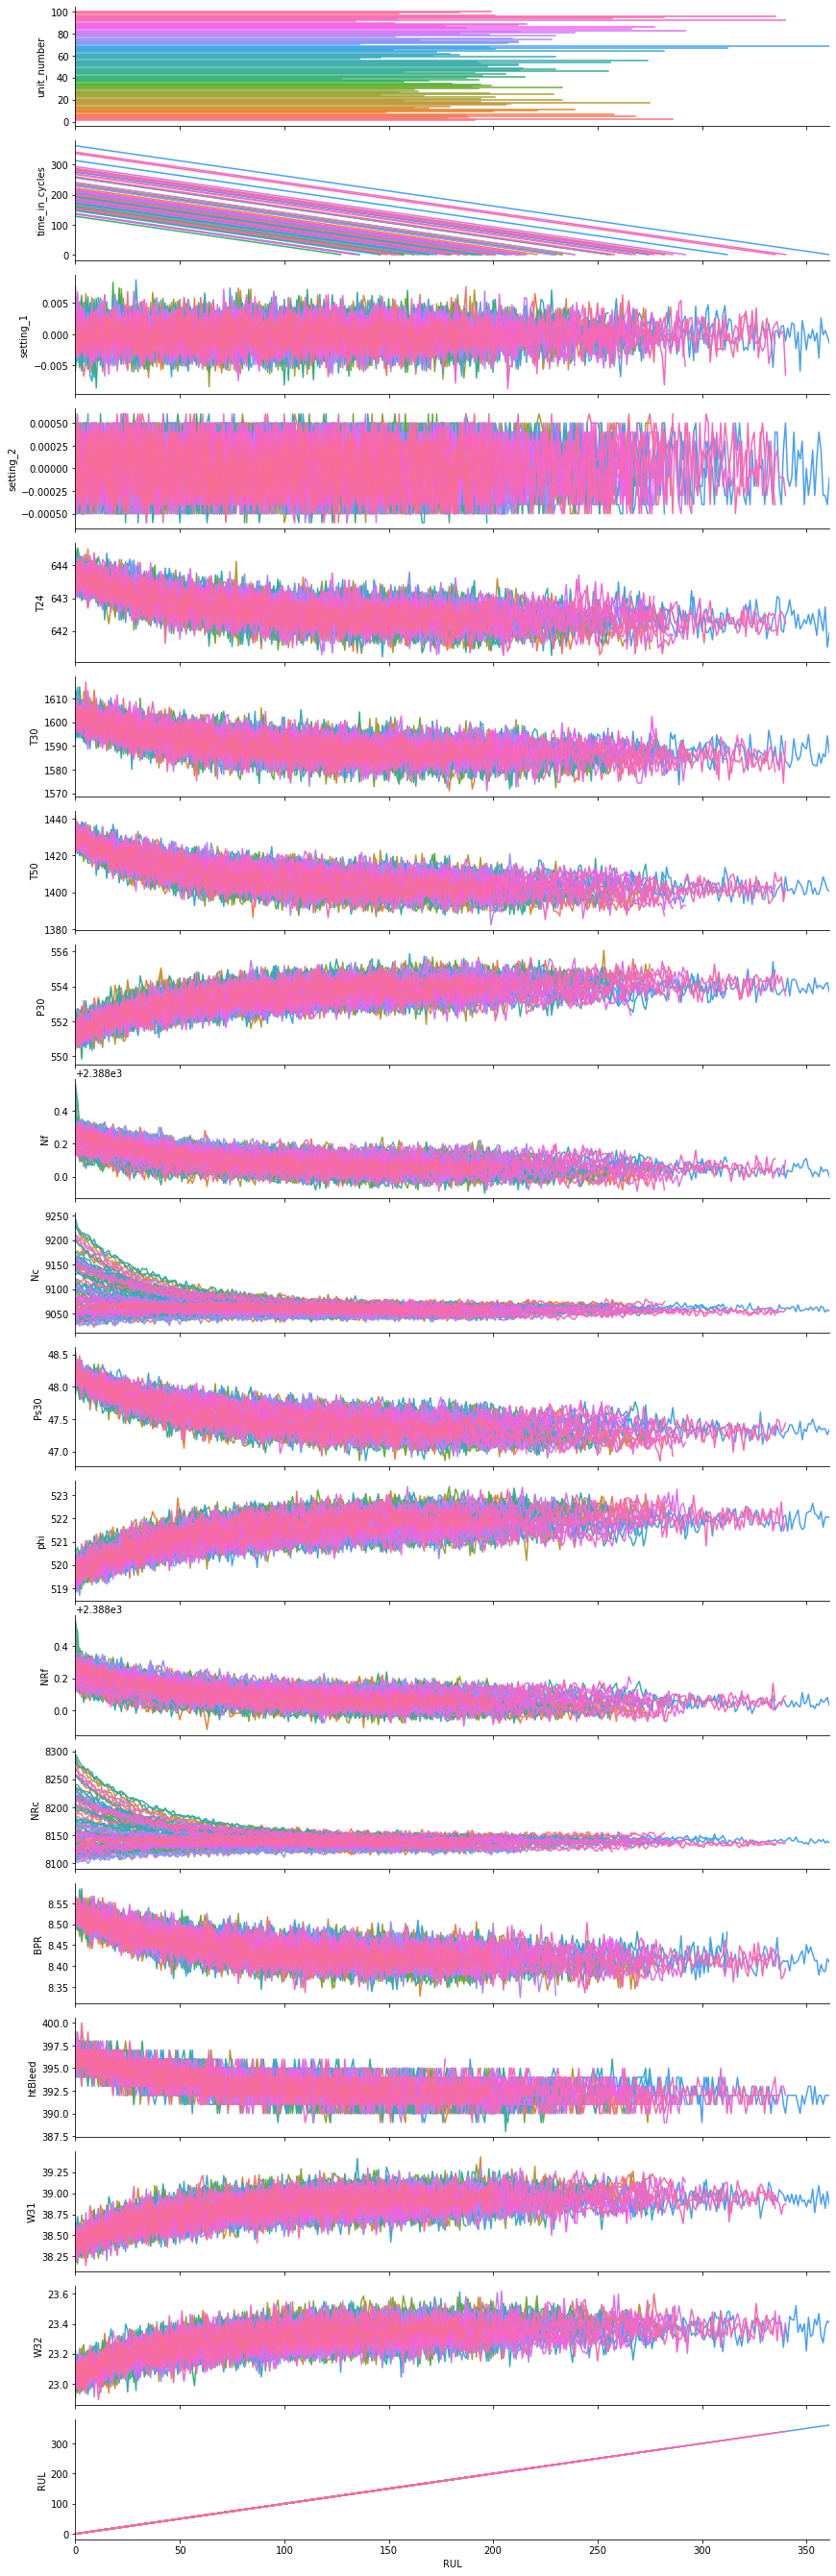

In [ ]:
# plot all engines sensor data
g = sns.PairGrid(data=df, x_vars='RUL', y_vars=df[4:17], hue="unit_number", height=2, aspect=6,)
g = g.map(plt.plot)
g = g.set(xlim=(df['RUL'].min(), df['RUL'].max()))

### O que é correlação?
> "Quando falamos em análise de dados, muitas vezes precisamos entender qual é a associação entre duas ou mais variáveis. Nesse caso, a análise de correlação é uma forma descritiva que mede se existe e qual o grau de dependência entre as variáveis, ou seja, o quanto uma variável interfere em outra, lembrando que essa relação de dependência pode ou não ser causal. Essa medida do grau de relação é medida por meio de coeficientes."

Aprofunde seu conhecimento [coeficiente de correlação de Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coeficiente).

### Como podemos interpretar os valores que **ρ** pode representar?
* ρ = 0,9 a 1 (positivo ou negativo): muito forte;
* ρ = 0,7 a 09 (positivo ou negativo): forte;
* ρ = 0,5 a 0,7 (positivo ou negativo): moderado;
* ρ = 0,3 a 0,5 (positivo ou negativo): fraco;
* ρ = 0 a 0,3 (positivo ou negativo): nenhum.

O valor de correlação pode dizer que 'var x' aumenta ou diminui em função de 'var y', ou nada acontece quando não temos uma correlação.